In [ ]:
import math
from scipy.stats import norm
# S = 今日現貨價
# K = 履約價
# T = 今日至到期日剩幾天
# r = 無風險利率
# vol = 波動率
# 有點類似r是期望值 vol是標準差
def blscall(S, K, T, r, vol):
  d1 = (math.log(S/K) + (r+vol*vol/2) * T) / (vol*math.sqrt(T))
  d2 = d1-vol*math.sqrt(T)
  c = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)
  return c

In [8]:
def BisectionBLS(S, K, T, r, call):
  left = 1e-8
  right = 1
  threshold = 1e-10
  while(right - left >= threshold):
    middle = (left+right) / 2
    if((blscall(S, K, T, r, left) - call) * (blscall(S,K,T,r,middle)-call) < 0):
      right = middle
    else:
      left = middle
  return (left+right)/2

In [9]:
S = 13552.46
K = []
for i in range(13000,15100,100):
  K.append(i)
print(K)
T = 22/365
r = 0.0141 #三年期定期儲蓄存款利率
call = [675, 610, 525, 448, 395, 345, 289, 238, 194, 153, 120, 92, 69, 52, 39.5, 28, 20.5, 16, 12, 9.8, 8.5]

[13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000]


In [10]:
vol = []
for i in range(0,21):
  vol.append(BisectionBLS(S, K[i], T, r, call[i]))
print(vol)

[0.24367986680211096, 0.2509330540306821, 0.2366134897834159, 0.22653071468119818, 0.2320625455718634, 0.23563515649973893, 0.23075037761917805, 0.22572494650489205, 0.22195680545216923, 0.21623244061776453, 0.21261658407581518, 0.20887607227859883, 0.2052902727754608, 0.20372289019283885, 0.20370768710865983, 0.20075552548567976, 0.2005022638391626, 0.20349423065424493, 0.20493092819185849, 0.2096843418126924, 0.21641867334944248]


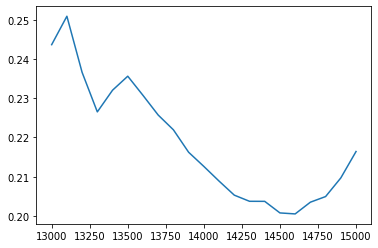

In [11]:
import matplotlib.pyplot as plt
#x軸為K, y軸為vol
plt.plot(K, vol)